# INNOMATICS RESEARCH LAB

# INTERNSHIP PROJECT

# TASK-3 DATA ANALYSIS

# INTRODUCTION

# Dataset

# Target Variable - INCOME - <=50k’ ‘income’ is 0 and ‘>50k’ is 1.

# The model building is a step-by-step process with following 3 major steps:

## Algorithm Selection

## Training Model

## Predicting

# Objective of this project

### The goal of this machine learning project is to predict whether a person makes over 50K a year or not given their demographic variation. This is a classification problem.

# Features Description

### Categorical Attributes

### Continuous Attributes

# IMPORT LIBRARIES

In [156]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as pplt  
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,classification_report

In [189]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
from sklearn import metrics
from datetime import datetime
from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier

In [191]:
import xgboost

## Reading the data

In [3]:
data = pd.read_csv("adult1.csv")

## First five rows of data

In [4]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
data.shape

(48842, 15)

# Summary 

In [6]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


# Attributes Types

In [7]:
data.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

# Finding the missing values

In [8]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

## There are no missing values in the dataset

# Columns of the dataset

In [9]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

# Finding the special characters in the data frame 

In [11]:
data.isin(['?']).sum(axis=0)

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

## We see that there is a special character as " ?" for columns workcalss, Occupation, and country

In [12]:
data['native-country'] = data['native-country'].replace('?',np.nan)
data['workclass'] = data['workclass'].replace('?',np.nan)
data['occupation'] = data['occupation'].replace('?',np.nan)

# Replacing the special character to nan and then dropping the columns

## Dropping the nan columns now

In [13]:
 data.dropna(how='any',inplace=True)

# Finding if special characters are present in the data 

In [14]:
data.isin(['?']).sum(axis=0)

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

# Checking the levels of different attributes

In [15]:
data.workclass.value_counts()

Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64

In [16]:
data.occupation.value_counts()

Craft-repair         6020
Prof-specialty       6008
Exec-managerial      5984
Adm-clerical         5540
Sales                5408
Other-service        4808
Machine-op-inspct    2970
Transport-moving     2316
Handlers-cleaners    2046
Farming-fishing      1480
Tech-support         1420
Protective-serv       976
Priv-house-serv       232
Armed-Forces           14
Name: occupation, dtype: int64

# Feature Engineering

# Education

In [19]:
hs_grad = ['HS-grad','11th','10th','9th','12th']
elementary = ['1st-4th','5th-6th','7th-8th']

# replace elements in list.
data['education'].replace(to_replace = hs_grad,value = 'HS-grad',inplace = True)
data['education'].replace(to_replace = elementary,value = 'elementary_school',inplace = True)

data['education'].value_counts()

HS-grad              18878
Some-college          9899
Bachelors             7570
Masters               2514
Assoc-voc             1959
Assoc-acdm            1507
elementary_school     1494
Prof-school            785
Doctorate              544
Preschool               72
Name: education, dtype: int64

# Marital Status

In [20]:
married= ['Married-spouse-absent','Married-civ-spouse','Married-AF-spouse']
separated = ['Separated','Divorced']

#replace elements in list.
data['marital-status'].replace(to_replace = married ,value = 'Married',inplace = True)
data['marital-status'].replace(to_replace = separated,value = 'Separated',inplace = True)

data['marital-status'].value_counts()

Married          21639
Never-married    14598
Separated         7708
Widowed           1277
Name: marital-status, dtype: int64

# Workclass

In [21]:
self_employed = ['Self-emp-not-inc','Self-emp-inc']
govt_employees = ['Local-gov','State-gov','Federal-gov']

#replace elements in list.
data['workclass'].replace(to_replace = self_employed ,value = 'Self_employed',inplace = True)
data['workclass'].replace(to_replace = govt_employees,value = 'Govt_employees',inplace = True)

data['workclass'].value_counts()

Private           33307
Govt_employees     6452
Self_employed      5442
Without-pay          21
Name: workclass, dtype: int64

# Deleting the unuseful features and observations

In [22]:
del_cols = ['relationship','educational-num']
data.drop(labels = del_cols,axis = 1,inplace = True)

# Drop rows with age 90

In [23]:
print("Number of observation before removing:",data.shape)
index_age = data[data['age'] == 90].index
data.drop(labels = index_age,axis = 0,inplace =True)
print("Number of observation after removing:",data.shape)

Number of observation before removing: (45222, 13)
Number of observation after removing: (45176, 13)


In [24]:
print("Number of observation before removing:",data.shape)
index_gain = data[data['capital-gain'] == 99999].index
data.drop(labels = index_gain,axis = 0,inplace =True)
print("Number of observation after removing:",data.shape)

Number of observation before removing: (45176, 13)
Number of observation after removing: (44947, 13)


# Updating the columns

In [25]:
num_col_new = ['age','capital-gain', 'capital-loss',
       'hours-per-week','fnlwgt']
cat_col_new = ['workclass', 'education', 'marital-status', 'occupation',
               'race', 'gender', 'income']

# Let's see how many unique categories we have in this income

In [26]:
income = set(data['income'])
print(income)

{'>50K', '<=50K'}


# Mapping the data into numerical data using map function

In [27]:
data['income'] = data['income'].map({'<=50K': 0, '>50K': 1}).astype(int)

# Let's see how many unique categories we have in this gender property

In [28]:
gender = set(data['gender'])
print(gender)

{'Female', 'Male'}


# Mapping the values to numerical values 

In [29]:
data=data.dropna(axis=0, how='any')

In [30]:
data['gender'] = data['gender'].map({'Male': 0, 'Female': 1}).astype(int)

# How many unique races we got here?

In [31]:
race = set(data['race'])
print(race)

{'Black', 'Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Other', 'White'}


# Mapping the values to numerical values 

In [32]:
data['race'] = data['race'].map({'Black': 0, 'Asian-Pac-Islander': 1, 'Other': 2, 'White': 3, 
                                             'Amer-Indian-Eskimo': 4}).astype(int)

# How many unique races we got here?

In [33]:
Marital = set(data['marital-status'])
print(Marital)

{'Widowed', 'Never-married', 'Married', 'Separated'}


# Mapping the values to numerical values

In [34]:
 data['marital-status'] = data['marital-status'].map({'Married-spouse-absent': 0, 'Widowed': 1, 
                                                             'Married': 2, 'Separated': 3, 
                                                             'Never-married': 5}).astype(int)

# How many unique Workclass we got here?

In [35]:
emp = set(data['workclass'])
print(emp)

{'Private', 'Self_employed', 'Without-pay', 'Govt_employees'}


# Mapping the values to numerical values

In [36]:
data=data.dropna(axis=0, how='any')

In [37]:
data['workclass'] = data['workclass'].map({'Private': 0, 'Govt_employees': 1, 'Self_employed': 2, 'Without-pay': 3}).astype(int)

# How many unique Education we got here?

In [38]:
ed = set(data['education'])
print(ed)

{'Bachelors', 'Masters', 'Preschool', 'Assoc-acdm', 'elementary_school', 'HS-grad', 'Some-college', 'Assoc-voc', 'Doctorate', 'Prof-school'}


# Mapping the values to numerical values

In [39]:
data['education'] = data['education'].map({'Doctorate': 0, 'HS-grad': 1, 
                                                        'Some-college': 2, 'elementary_school': 3, 'Assoc-acdm': 4, 
                                                        'Prof-school': 5, 'Preschool': 6, 'Assoc-voc': 7,
                                                        'Masters': 8, 'Bachelors': 9}).astype(int)

# Let's see how many unique categories we have in this Occupation

In [40]:
occupation = set(data['occupation'])
print(occupation)

{'Handlers-cleaners', 'Exec-managerial', 'Other-service', 'Armed-Forces', 'Sales', 'Craft-repair', 'Tech-support', 'Protective-serv', 'Priv-house-serv', 'Adm-clerical', 'Machine-op-inspct', 'Transport-moving', 'Farming-fishing', 'Prof-specialty'}


# Now we classify them as numbers instead of their names

In [41]:
data['occupation'] = data['occupation'].map({ 'Farming-fishing': 1, 'Tech-support': 2, 
                                          'Adm-clerical': 3, 'Handlers-cleaners': 4, 
                                         'Prof-specialty': 5,'Machine-op-inspct': 6, 
                                         'Exec-managerial': 7, 
                                         'Priv-house-serv': 8,
                                         'Craft-repair': 9, 
                                         'Sales': 10, 
                                         'Transport-moving': 11, 
                                         'Armed-Forces': 12, 
                                         'Other-service': 13,  
                                         'Protective-serv': 14}).astype(int)

# Displaying the cleaned data to see if the map as worked

In [44]:
data.head()

,age,workclass,fnlwgt,education,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,0,226802,1,5,6,0,0,0,0,40,United-States,0
1,38,0,89814,1,2,1,3,0,0,0,50,United-States,0
2,28,1,336951,4,2,14,3,0,0,0,40,United-States,1
3,44,0,160323,2,2,6,0,0,7688,0,40,United-States,1
5,34,0,198693,1,5,13,3,0,0,0,30,United-States,0


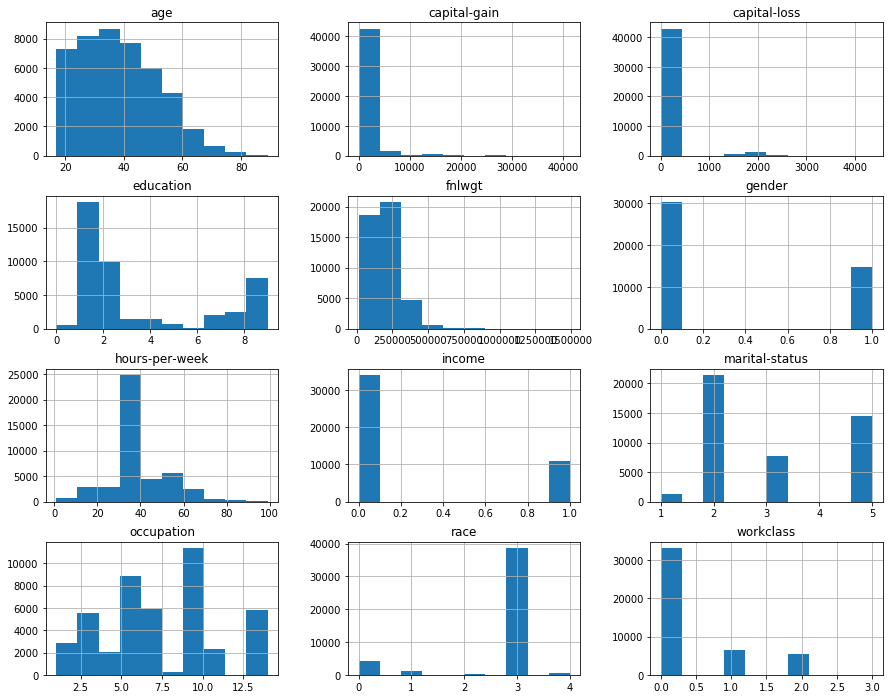

In [45]:
data.hist(figsize=(15,12));

# Plot for Income

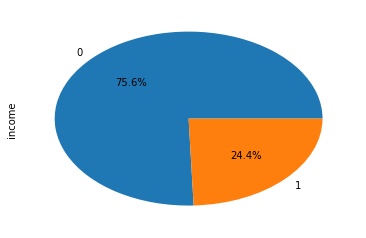

In [215]:
data.income.value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

# Distibution of Numerical Columns

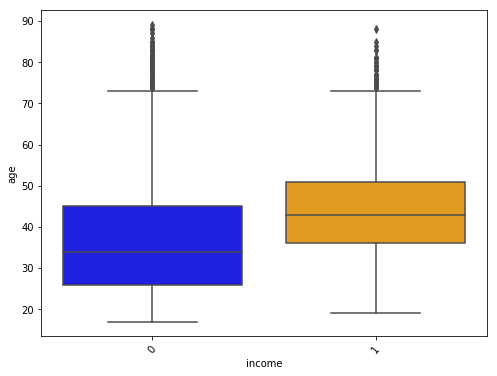

In [46]:
plt.figure(figsize=(8, 6))
plt.xticks(fontsize=10, rotation=50)
sns.boxplot(x="income", y="age", data=data,palette=['blue','orange'])

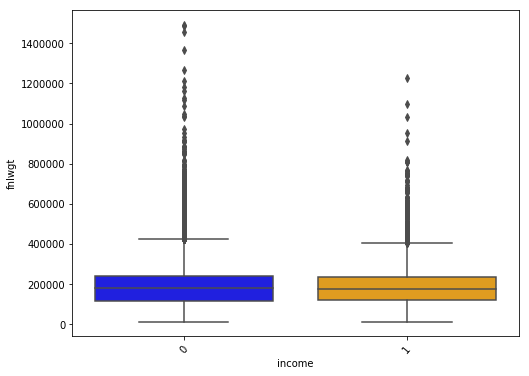

In [47]:
plt.figure(figsize=(8, 6))
plt.xticks(fontsize=10, rotation=50)
sns.boxplot(x="income", y="fnlwgt", data=data,palette=['blue','orange'])

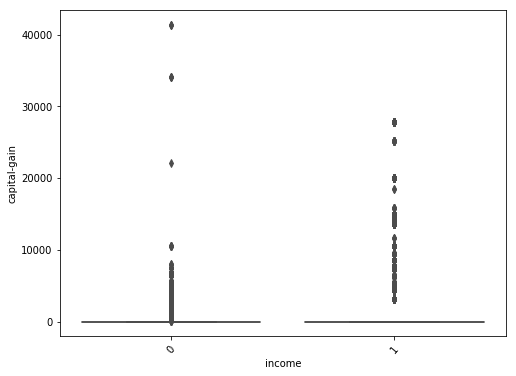

In [48]:
plt.figure(figsize=(8, 6))
plt.xticks(fontsize=10, rotation=50)
sns.boxplot(x="income", y="capital-gain", data=data,palette=['blue','orange'])

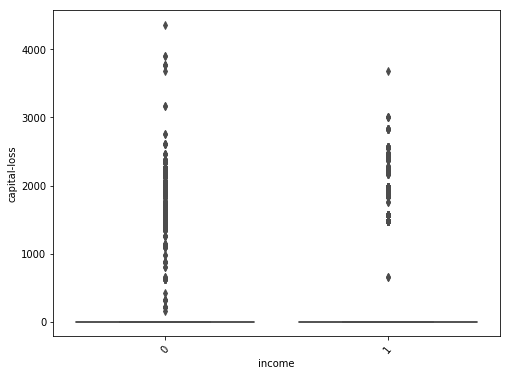

In [49]:
plt.figure(figsize=(8, 6))
plt.xticks(fontsize=10, rotation=50)
sns.boxplot(x="income", y="capital-loss", data=data,palette=['blue','orange'])

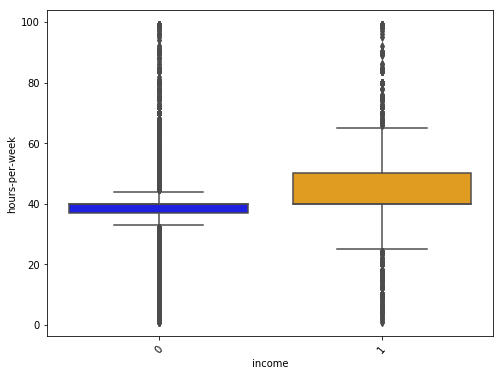

In [50]:
plt.figure(figsize=(8, 6))
plt.xticks(fontsize=10, rotation=50)
sns.boxplot(x="income", y="hours-per-week", data=data,palette=['blue','orange'])

# Handling extreme values using Quantile Clipping

# AGE

In [51]:
data_age= data['age'].loc[data['income']==1].values

In [52]:
data_age.shape

(10967,)

In [53]:
q75_age, q25_age = np.percentile(data_age,q=75),np.percentile(data_age,q=25)

In [54]:
q75_age, q25_age

(51.0, 36.0)

In [55]:
iqr=q75_age- q25_age
lower, upper=q25_age-iqr, q75_age + iqr
data['age']=data['age'].clip(lower=lower,upper=upper)

In [56]:
lower,upper

(21.0, 66.0)

In [57]:
data['age'].describe()

count    44947.000000
mean        38.458006
std         12.535959
min         21.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         66.000000
Name: age, dtype: float64

In [58]:
data['age'].shape

(44947,)

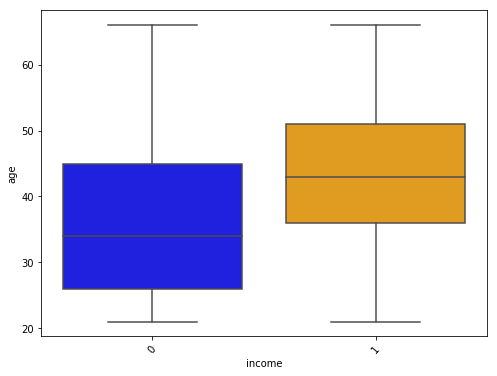

In [59]:
plt.figure(figsize=(8, 6))
plt.xticks(fontsize=10, rotation=50)
sns.boxplot(x="income", y="age", data=data,palette=['blue','orange'])

# fnlwgt

In [60]:
data_fnlwgt= data['fnlwgt'].loc[data['income']==1].values

In [61]:
data_fnlwgt.shape

(10967,)

In [62]:
q75_fnlwgt, q25_fnlwgt = np.percentile(data_fnlwgt,q=75),np.percentile(data_fnlwgt,q=25)

In [63]:
q75_fnlwgt, q25_fnlwgt

(233731.5, 118942.5)

In [64]:
iqr=q75_fnlwgt- q25_fnlwgt
lower, upper=q25_fnlwgt-iqr, q75_fnlwgt + iqr
data['fnlwgt']=data['fnlwgt'].clip(lower=lower,upper=upper)

In [65]:
lower,upper

(4153.5, 348520.5)

In [66]:
data['fnlwgt'].describe()

count     44947.000000
mean     183442.933121
std       88112.748311
min       13492.000000
25%      117426.500000
50%      178326.000000
75%      237949.500000
max      348520.500000
Name: fnlwgt, dtype: float64

In [67]:
data['fnlwgt'].shape

(44947,)

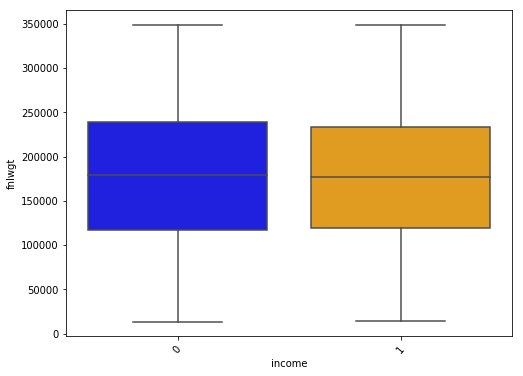

In [68]:
plt.figure(figsize=(8, 6))
plt.xticks(fontsize=10, rotation=50)
sns.boxplot(x="income", y="fnlwgt", data=data,palette=['blue','orange'])

# Hours Per Week

In [69]:
data_hpw= data['hours-per-week'].loc[data['income']==1].values

In [70]:
data_hpw.shape

(10967,)

In [71]:
q75_hpw, q25_hpw = np.percentile(data_hpw,q=75),np.percentile(data_hpw,q=25)

In [72]:
q75_hpw, q25_hpw

(50.0, 40.0)

In [73]:
iqr=q75_hpw- q25_hpw
lower, upper=q25_hpw-iqr, q75_hpw + iqr
data['hours-per-week']=data['hours-per-week'].clip(lower=lower,upper=upper)

In [74]:
lower,upper

(30.0, 60.0)

In [75]:
data['hours-per-week'].describe()

count    44947.000000
mean        41.700002
std          8.042653
min         30.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         60.000000
Name: hours-per-week, dtype: float64

In [76]:
data['hours-per-week'].shape

(44947,)

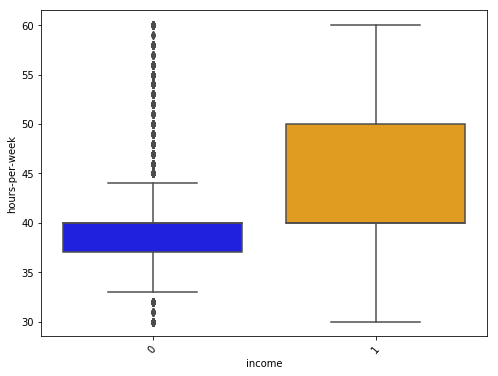

In [77]:
plt.figure(figsize=(8, 6))
plt.xticks(fontsize=10, rotation=50)
sns.boxplot(x="income", y="hours-per-week", data=data,palette=['blue','orange'])

In [78]:
data_hpw= data['hours-per-week'].loc[data['income']==0].values

In [79]:
data_hpw.shape

(33980,)

In [80]:
q75_hpw, q25_hpw = np.percentile(data_hpw,q=75),np.percentile(data_hpw,q=25)

In [81]:
q75_hpw, q25_hpw

(40.0, 37.0)

In [82]:
iqr=q75_hpw- q25_hpw
lower, upper=q25_hpw-iqr, q75_hpw + iqr
data['hours-per-week']=data['hours-per-week'].clip(lower=lower,upper=upper)

In [83]:
lower,upper

(34.0, 43.0)

In [84]:
data['hours-per-week'].describe()

count    44947.000000
mean        39.692727
std          3.065735
min         34.000000
25%         40.000000
50%         40.000000
75%         43.000000
max         43.000000
Name: hours-per-week, dtype: float64

In [85]:
data['hours-per-week'].shape

(44947,)

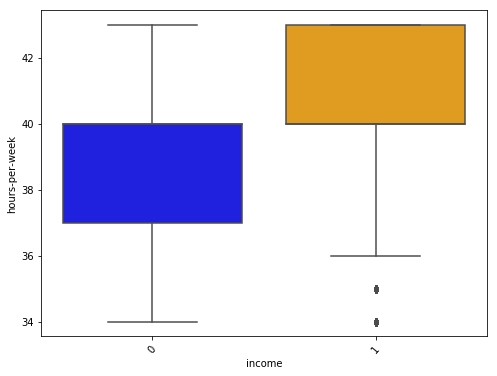

In [86]:
plt.figure(figsize=(8, 6))
plt.xticks(fontsize=10, rotation=50)
sns.boxplot(x="income", y="hours-per-week", data=data,palette=['blue','orange'])

In [87]:
data.describe()

,age,workclass,fnlwgt,education,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,income
count,44947.000000,44947.000000,44947.000000,44947.000000,44947.000000,44947.000000,44947.000000,44947.000000,44947.000000,44947.000000,44947.000000,44947.000000
mean,38.458006,0.382139,183442.933121,3.429995,3.114401,7.318486,2.663226,0.325939,595.945491,89.004539,39.692727,0.243998
std,12.535959,0.690316,88112.748311,3.164530,1.368494,3.491036,0.928868,0.468730,2563.015490,405.834577,3.065735,0.429497
min,21.000000,0.000000,13492.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.000000
25%,28.000000,0.000000,117426.500000,1.000000,2.000000,5.000000,3.000000,0.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,0.000000,178326.000000,2.000000,2.000000,7.000000,3.000000,0.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,1.000000,237949.500000,7.000000,5.000000,10.000000,3.000000,1.000000,0.000000,0.000000,43.000000,0.000000
max,66.000000,3.000000,348520.500000,9.000000,5.000000,14.000000,4.000000,1.000000,41310.000000,4356.000000,43.000000,1.000000


# Converting the data into appropriate data types

In [88]:
data.dtypes

age               float64
workclass           int32
fnlwgt            float64
education           int32
marital-status      int32
occupation          int32
race                int32
gender              int32
capital-gain        int64
capital-loss        int64
hours-per-week    float64
native-country     object
income              int32
dtype: object

In [90]:
num_attr = ['age','fnlwgt','capital-gain','capital-loss','hours-per-week','income']

In [91]:
cat_attr = ['workclass','education','marital-status','occupation','race','gender','native-country']

In [92]:
data[cat_attr] = data[cat_attr].astype('category')

In [93]:
data[num_attr] = data[num_attr].astype('int')

In [94]:
data.dtypes

age                  int32
workclass         category
fnlwgt               int32
education         category
marital-status    category
occupation        category
race              category
gender            category
capital-gain         int32
capital-loss         int32
hours-per-week       int32
native-country    category
income               int32
dtype: object

# Univariate Analysis on Categorical Columns

In [95]:
def barplot(column,data):
    bar_plot1 = sns.countplot(x=column, data=data)
    
    total = len(data[column])
    for p in bar_plot1.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        height = p.get_height()
        bar_plot1.text(p.get_x()+ p.get_width()/2, height + 30, percentage, ha="center")

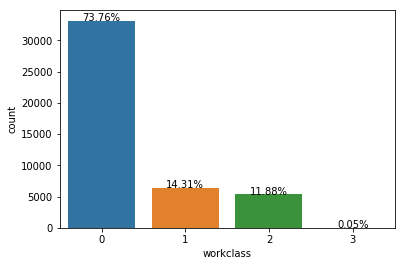

In [96]:
barplot("workclass",data)

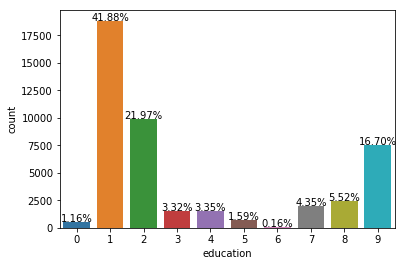

In [97]:
barplot("education",data)

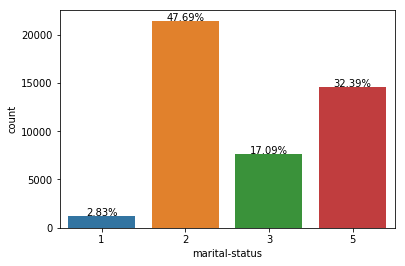

In [98]:
barplot("marital-status",data)

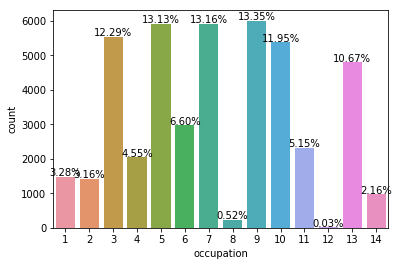

In [99]:
barplot("occupation",data)

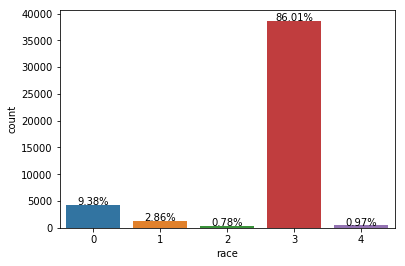

In [100]:
barplot("race",data)

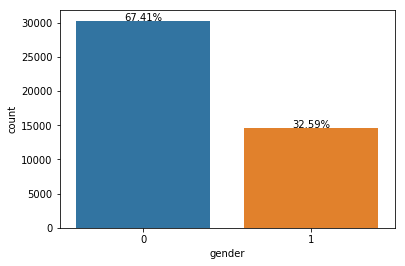

In [101]:
barplot("gender",data)

# Feature Engineering

In [103]:
NorthAmerica_1 = ['United-States','Mexico','Puerto-Rico','Canada','El-Salvador','Cuba','Jamaica','Dominican-Republic','Guatemala','Haiti','Nicaragua','Honduras']
Asia_1 = ['Philippines','India','China','Japan','Vietnam','Iran','Taiwan','Thailand','Hong','Cambodia','Laos']
Europe_1 = ['Germany','England','Italy','Poland','Portugal','Greece','Ireland','France','Yugoslavia','Scotland','Hungary','Holand-Netherlands']
Africa_1 = ['South']
SouthAmerica_1 = ['Columbia','Peru','Ecuador','Trinadad&Tobago']
Oceania_1 = ['Outlying-US(Guam-USVI-etc)']





In [104]:
# replace elements in list.
data['native-country'].replace(to_replace = NorthAmerica_1,value = 'NA',inplace = True)
data['native-country'].replace(to_replace = Asia_1,value = 'Asia',inplace = True)
data['native-country'].replace(to_replace = Europe_1,value = 'Europe',inplace = True)
data['native-country'].replace(to_replace = Africa_1,value = 'Africa',inplace = True)
data['native-country'].replace(to_replace = SouthAmerica_1,value = 'SA',inplace = True)
data['native-country'].replace(to_replace = Oceania_1,value = 'Oceania',inplace = True)
data['native-country'].value_counts()

NA         42974
Asia         919
Europe       737
SA           195
Africa       100
Oceania       22
Name: native-country, dtype: int64

# How many unique native-country we got here?

In [108]:
nativecountry = set(data['native-country'])
print(nativecountry)

{'NA', 'Oceania', 'Asia', 'Europe', 'SA', 'Africa'}


# Mapping the values to numerical values

In [109]:
data['native-country'] = data['native-country'].map({'NA': 0, 'SA': 1,'Asia': 2, 'Europe': 3, 'Africa': 4, 'Oceania':5}).astype(int)

In [110]:
data.head()

,age,workclass,fnlwgt,education,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,0,226802,1,5,6,0,0,0,0,40,0,0
1,38,0,89814,1,2,1,3,0,0,0,43,0,0
2,28,1,336951,4,2,14,3,0,0,0,40,0,1
3,44,0,160323,2,2,6,0,0,7688,0,40,0,1
5,34,0,198693,1,5,13,3,0,0,0,34,0,0


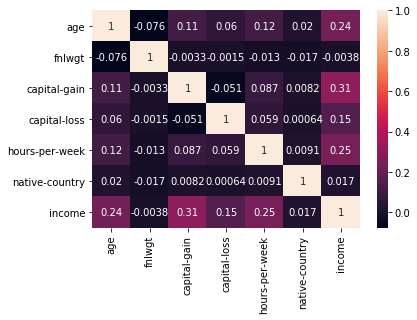

In [111]:
sns.heatmap(data.corr(),annot=True)

# Relationship of categorical variables with target

In [216]:
pd.crosstab(data['workclass'],data['income'])

income,0,1
workclass,,
0,26031,7122
1,4463,1970
2,3467,1873
3,19,2


In [217]:
pd.crosstab(data['education'],data['income'])

income,0,1
education,,
1,16194,2630
4,1108,396
2,7902,1975
5,192,523
3,1407,84
9,4387,3119
8,1119,1362
7,1455,501
0,145,376


In [218]:
pd.crosstab(data['marital-status'],data['income'])

income,0,1
marital-status,,
5,13883,677
2,11993,9441
1,1153,119
3,6951,730


In [219]:
pd.crosstab(data['occupation'],data['income'])

income,0,1
occupation,,
6,2602,364
1,1307,169
14,668,305
13,4605,193
5,3299,2603
9,4662,1338
3,4779,747
7,3112,2801
2,1009,410


In [220]:
pd.crosstab(data['race'],data['income'])

income,0,1
race,,
0,3692,524
3,28669,9990
2,308,42
4,382,53
1,929,358


In [221]:
pd.crosstab(data['gender'],data['income'])

income,0,1
gender,,
0,20963,9334
1,13017,1633


In [222]:
pd.crosstab(data['native-country'],data['income'])

income,0,1
native-country,,
0,32547,10427
1,180,15
2,638,281
3,512,225
4,82,18
5,21,1


# Density plots

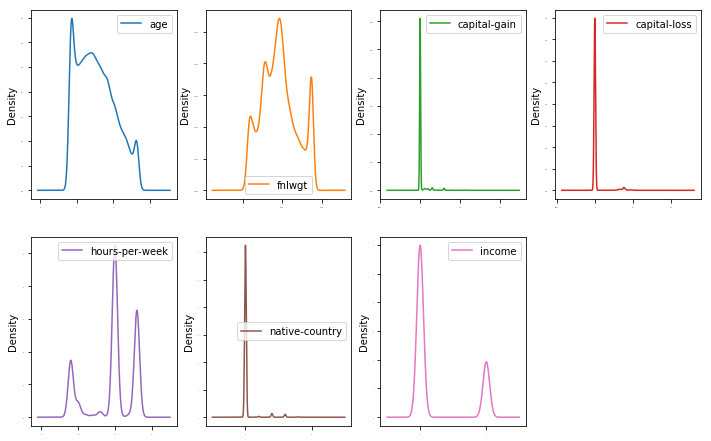

In [115]:
data.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=True, fontsize=1, figsize=(12,16))
pplt.show()

# Divide the data into train and test

In [116]:
#Splitting the data
y=data["income"]
X=data.drop('income', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,stratify=y,random_state=123)  

In [117]:
print(y_train.value_counts(normalize=True)*100)
print("\n")
print(y_test.value_counts(normalize=True)*100)

0    75.601413
1    24.398587
Name: income, dtype: float64


0    75.595106
1    24.404894
Name: income, dtype: float64


# Converting Categorical attributes to Numeric attributes

In [118]:
cat_attr = X_train.select_dtypes(include=['category']).columns
cat_attr

Index(['workclass', 'education', 'marital-status', 'occupation', 'race',
       'gender'],
      dtype='object')

# Using OneHotEncoder, converting Categorical attributes to Numeric attributes

In [122]:
enc = OneHotEncoder(drop = 'first')

enc.fit(X_train[cat_attr])

OneHotEncoder(drop='first')

In [123]:
col_names = enc.get_feature_names()

In [124]:
col_names

array(['x0_1', 'x0_2', 'x0_3', 'x1_1', 'x1_2', 'x1_3', 'x1_4', 'x1_5',
       'x1_6', 'x1_7', 'x1_8', 'x1_9', 'x2_2', 'x2_3', 'x2_5', 'x3_2',
       'x3_3', 'x3_4', 'x3_5', 'x3_6', 'x3_7', 'x3_8', 'x3_9', 'x3_10',
       'x3_11', 'x3_12', 'x3_13', 'x3_14', 'x4_1', 'x4_2', 'x4_3', 'x4_4',
       'x5_1'], dtype=object)

In [125]:
X_train_ohe=enc.transform(X_train[cat_attr]).toarray()
X_test_ohe=enc.transform(X_test[cat_attr]).toarray()

In [126]:
X_train_ohe[0:10]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
        1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
        0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
        0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.

# Standardize the numerical attributes

# Store numerical attributes name

In [135]:
num_attr = X_train.select_dtypes(include=['int32']).columns

In [136]:
num_attr

Index(['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country'],
      dtype='object')

# Using StandardScaler, standardize the numerical attributes

In [137]:
scaler = StandardScaler()
scaler.fit(X_train[num_attr])

StandardScaler()

In [138]:
X_train_std = scaler.transform(X_train[num_attr])
X_test_std = scaler.transform(X_test[num_attr])

In [139]:
print(X_train_std.shape)
print(X_test_std.shape)

(35957, 6)
(8990, 6)


# Concatenate attribute

In [140]:
X_train_con = np.concatenate([X_train_std, X_train_ohe], axis=1)
X_test_con = np.concatenate([X_test_std, X_test_ohe], axis=1)

In [141]:
X_train_con.shape

(35957, 39)

In [142]:
X_test_con.shape

(8990, 39)

In [143]:
print(pd.value_counts(y_train))
print(pd.value_counts(y_test))

0    27184
1     8773
Name: income, dtype: int64
0    6796
1    2194
Name: income, dtype: int64


# Model Building

# Using Decision Tree as the base model

# Decision Tree

In [144]:
clf_dt = DecisionTreeClassifier(max_depth=10)

In [146]:
clf_dt.fit(X_train_con,y_train)

DecisionTreeClassifier(max_depth=10)

In [149]:
y_pred_train = clf_dt.predict(X_train_con)
y_pred_val = clf_dt.predict(X_test_con)

In [150]:
def classifcation_report_train_test(y_train, y_train_pred, y_test, y_test_pred):

    print('''
            =========================================
               CLASSIFICATION REPORT FOR TRAIN DATA
            =========================================
            ''')
    print(classification_report(y_train, y_train_pred, digits=4))

    print('''
            =========================================
               CLASSIFICATION REPORT FOR VALIDATION DATA
            =========================================
            ''')
    print(classification_report(y_test, y_test_pred, digits=4))

In [154]:
scores = pd.DataFrame(columns=['Model', 'Train_Accuracy', 'Train_Recall', 'Train_Precision', 'Train_F1', 
                               'Test_Accuracy', 'Test_Recall', 'Test_Precision', 'Test_F1'])

def get_metrics(train_actual, train_predicted, test_actual, test_predicted, model_description, dataframe):

    train_accuracy  = accuracy_score(train_actual, train_predicted)
    train_recall    = recall_score(train_actual, train_predicted, average="weighted")
    train_precision = precision_score(train_actual, train_predicted, average="weighted")
    train_f1score   = f1_score(train_actual, train_predicted, average="weighted")
    
    test_accuracy   = accuracy_score(test_actual, test_predicted)
    test_recall     = recall_score(test_actual, test_predicted, average="weighted")
    test_precision  = precision_score(test_actual, test_predicted, average="weighted")
    test_f1score    = f1_score(test_actual, test_predicted, average="weighted")

    dataframe       = dataframe.append(pd.Series([model_description, 
                                                  train_accuracy, train_recall, train_precision, train_f1score,
                                                  test_accuracy, test_recall, test_precision, test_f1score],
                                                 index=scores.columns ), 
                                       ignore_index=True)

    return(dataframe)

In [157]:
scores = get_metrics(y_train, y_pred_train, y_pred_val, y_test, "DecisionTrees", scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1,Test_Accuracy,Test_Recall,Test_Precision,Test_F1
0,DecisionTrees,0.859972,0.859972,0.854258,0.852941,0.851613,0.851613,0.872014,0.858687


In [159]:
classifcation_report_train_test(y_train, y_pred_train, y_test, y_pred_val)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.8778    0.9465    0.9109     27184
           1     0.7813    0.5917    0.6734      8773

    accuracy                         0.8600     35957
   macro avg     0.8296    0.7691    0.7921     35957
weighted avg     0.8543    0.8600    0.8529     35957


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.8738    0.9394    0.9054      6796
           1     0.7553    0.5798    0.6560      2194

    accuracy                         0.8516      8990
   macro avg     0.8146    0.7596    0.7807      8990
weighted avg     0.8449    0.8516    0.8445      8990



# GridSearch CV

In [160]:
clf_dt_gs = DecisionTreeClassifier()
parameters = {'criterion': ['entropy','gini'], 
              'max_depth': [3,4,5],
            
              'min_samples_leaf': [2]}

from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(clf_dt_gs, parameters, cv=5, scoring='recall', verbose=50, n_jobs=-1, refit=True)

In [162]:
gs.fit(X_train_con, y_train )

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [2]},
             scoring='recall', verbose=50)

In [163]:
gs.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2}

In [165]:
train_pred_dt = gs.predict(X_train_con)
test_pred_dt = gs.predict(X_test_con)

In [166]:
def evaluate_model(act, pred):
    print("Confusion Matrix \n", confusion_matrix(act, pred))
    print("Accuracy : ", accuracy_score(act, pred))
    print("Recall   : ", recall_score(act, pred,average="macro"))
    print("Precision: ", precision_score(act, pred,average="macro"))
    print("F1_score : ", f1_score(act, pred,average="macro"))

In [167]:
print("--Train--")
evaluate_model(y_train, train_pred_dt)

--Train--
Confusion Matrix 
 [[23057  4127]
 [ 2442  6331]]
Accuracy :  0.8173095642016853
Recall   :  0.7849143568772425
Precision:  0.7548027074749597
F1_score :  0.7668634601671874


In [169]:
print("--Test--")
evaluate_model(y_test, test_pred_dt)

--Test--
Confusion Matrix 
 [[5822  974]
 [ 611 1583]]
Accuracy :  0.8236929922135706
Recall   :  0.7890968090511712
Precision:  0.7620529253097768
F1_score :  0.7732867454618328


# Random Forest

In [171]:
clf_rf = RandomForestClassifier()

In [172]:
clf_rf.fit(X=X_train_con, y=y_train)

RandomForestClassifier()

In [173]:
y_pred_train1 = clf_rf.predict(X_train_con)
y_pred_val1 = clf_rf.predict(X_test_con)

In [174]:
classifcation_report_train_test(y_train, y_pred_train1, y_test, y_pred_val1)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.9993    0.9996    0.9994     27184
           1     0.9987    0.9978    0.9983      8773

    accuracy                         0.9992     35957
   macro avg     0.9990    0.9987    0.9989     35957
weighted avg     0.9992    0.9992    0.9992     35957


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.8767    0.9167    0.8963      6796
           1     0.6996    0.6007    0.6464      2194

    accuracy                         0.8396      8990
   macro avg     0.7881    0.7587    0.7713      8990
weighted avg     0.8335    0.8396    0.8353      8990



In [176]:
scores = get_metrics(y_train, y_pred_train1, y_test, y_pred_val1, "RandomForest", scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1,Test_Accuracy,Test_Recall,Test_Precision,Test_F1
0,DecisionTrees,0.859972,0.859972,0.854258,0.852941,0.851613,0.851613,0.872014,0.858687
1,RandomForest,0.999166,0.999166,0.999166,0.999166,0.839600,0.839600,0.833491,0.835291


# AdaBoost

In [177]:
clf_adaboost =  AdaBoostClassifier()

In [178]:
clf_adaboost.fit(X_train_con, y_train)

AdaBoostClassifier()

In [179]:
y_pred_train2 = clf_adaboost.predict(X_train_con)
y_pred_val2 = clf_adaboost.predict(X_test_con)

In [181]:
classifcation_report_train_test(y_train, y_pred_train2, y_test, y_pred_val2)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.8797    0.9372    0.9076     27184
           1     0.7561    0.6030    0.6709      8773

    accuracy                         0.8557     35957
   macro avg     0.8179    0.7701    0.7893     35957
weighted avg     0.8496    0.8557    0.8498     35957


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.8799    0.9420    0.9099      6796
           1     0.7701    0.6016    0.6755      2194

    accuracy                         0.8590      8990
   macro avg     0.8250    0.7718    0.7927      8990
weighted avg     0.8531    0.8590    0.8527      8990



In [182]:
scores = get_metrics(y_train, y_pred_train2, y_test, y_pred_val2, "Adaboost", scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1,Test_Accuracy,Test_Recall,Test_Precision,Test_F1
0,DecisionTrees,0.859972,0.859972,0.854258,0.852941,0.851613,0.851613,0.872014,0.858687
1,RandomForest,0.999166,0.999166,0.999166,0.999166,0.839600,0.839600,0.833491,0.835291
2,Adaboost,0.855689,0.855689,0.849581,0.849841,0.858954,0.858954,0.853095,0.852698


# Gradient Boost

In [183]:
clf_gbm = GradientBoostingClassifier()

In [184]:
clf_gbm.fit(X=X_train_con, y=y_train)

GradientBoostingClassifier()

In [185]:
y_pred_train3 = clf_gbm.predict(X_train_con)
y_pred_val3 = clf_gbm.predict(X_test_con)

In [186]:
classifcation_report_train_test(y_train, y_pred_train3, y_test, y_pred_val3)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.8802    0.9463    0.9121     27184
           1     0.7832    0.6008    0.6800      8773

    accuracy                         0.8620     35957
   macro avg     0.8317    0.7736    0.7960     35957
weighted avg     0.8565    0.8620    0.8554     35957


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.8785    0.9481    0.9120      6796
           1     0.7868    0.5939    0.6769      2194

    accuracy                         0.8616      8990
   macro avg     0.8327    0.7710    0.7944      8990
weighted avg     0.8561    0.8616    0.8546      8990



In [187]:
scores = get_metrics(y_train, y_pred_train3, y_test, y_pred_val3, "GBM", scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1,Test_Accuracy,Test_Recall,Test_Precision,Test_F1
0,DecisionTrees,0.859972,0.859972,0.854258,0.852941,0.851613,0.851613,0.872014,0.858687
1,RandomForest,0.999166,0.999166,0.999166,0.999166,0.839600,0.839600,0.833491,0.835291
2,Adaboost,0.855689,0.855689,0.849581,0.849841,0.858954,0.858954,0.853095,0.852698
3,GBM,0.862030,0.862030,0.856520,0.855437,0.861624,0.861624,0.856138,0.854590


# XGBoost

In [192]:
from xgboost import XGBClassifier

In [193]:
XGBClassifier(enable_categorical=True)

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=True, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)

In [194]:
clf_xgb = XGBClassifier()

In [196]:
X_train=X_train_con.astype(int)

In [197]:
clf_xgb.fit(X=X_train_con, y=y_train)

[15:27:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [198]:
X_val=X_test_con.astype(int)

In [199]:
y_pred_train4 = clf_xgb.predict(X_train_con)
y_pred_val4 = clf_xgb.predict(X_test_con)

In [200]:
classifcation_report_train_test(y_train, y_pred_train4, y_test, y_pred_val4)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.9073    0.9566    0.9313     27184
           1     0.8382    0.6971    0.7612      8773

    accuracy                         0.8933     35957
   macro avg     0.8727    0.8268    0.8462     35957
weighted avg     0.8904    0.8933    0.8898     35957


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.8879    0.9408    0.9136      6796
           1     0.7753    0.6322    0.6965      2194

    accuracy                         0.8655      8990
   macro avg     0.8316    0.7865    0.8050      8990
weighted avg     0.8604    0.8655    0.8606      8990



In [201]:
scores = get_metrics(y_train, y_pred_train4, y_test, y_pred_val4, "XGBoost", scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1,Test_Accuracy,Test_Recall,Test_Precision,Test_F1
0,DecisionTrees,0.859972,0.859972,0.854258,0.852941,0.851613,0.851613,0.872014,0.858687
1,RandomForest,0.999166,0.999166,0.999166,0.999166,0.839600,0.839600,0.833491,0.835291
2,Adaboost,0.855689,0.855689,0.849581,0.849841,0.858954,0.858954,0.853095,0.852698
3,GBM,0.862030,0.862030,0.856520,0.855437,0.861624,0.861624,0.856138,0.854590
4,XGBoost,0.893261,0.893261,0.890423,0.889770,0.865517,0.865517,0.860443,0.860626


In [202]:
XGB = XGBClassifier(n_jobs=-1)
 
# Use a grid over parameters of interest
param_grid = {
    'colsample_bytree': np.linspace(0.6, 0.8, 2),
    'n_estimators': [50, 100],
    'max_depth': [5, 6]}

CV_XGB = GridSearchCV(estimator=XGB, param_grid=param_grid, cv=3)

In [203]:
CV_XGB.fit(X=X_train_con, y=y_train)

[15:29:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:29:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:29:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:29:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=N

# Find best model

In [204]:
best_xgb_model = CV_XGB.best_estimator_

In [205]:
print(CV_XGB.best_score_, CV_XGB.best_params_)

0.864922054917684 {'colsample_bytree': 0.6, 'max_depth': 5, 'n_estimators': 50}


In [206]:
best_xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=-1, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [210]:
y_pred_train5 = best_xgb_model.predict(X_train_con)
y_pred_val5 = best_xgb_model.predict(X_test_con)

In [212]:
classifcation_report_train_test(y_train, y_pred_train5, y_test, y_pred_val5)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.8906    0.9485    0.9186     27184
           1     0.8002    0.6388    0.7104      8773

    accuracy                         0.8730     35957
   macro avg     0.8454    0.7937    0.8145     35957
weighted avg     0.8685    0.8730    0.8678     35957


               CLASSIFICATION REPORT FOR VALIDATION DATA
            
              precision    recall  f1-score   support

           0     0.8856    0.9478    0.9156      6796
           1     0.7932    0.6208    0.6965      2194

    accuracy                         0.8680      8990
   macro avg     0.8394    0.7843    0.8061      8990
weighted avg     0.8631    0.8680    0.8622      8990



In [213]:
scores = get_metrics(y_train, y_pred_train5, y_test, y_pred_val5, "best_xgb", scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1,Test_Accuracy,Test_Recall,Test_Precision,Test_F1
0,DecisionTrees,0.859972,0.859972,0.854258,0.852941,0.851613,0.851613,0.872014,0.858687
1,RandomForest,0.999166,0.999166,0.999166,0.999166,0.839600,0.839600,0.833491,0.835291
2,Adaboost,0.855689,0.855689,0.849581,0.849841,0.858954,0.858954,0.853095,0.852698
3,GBM,0.862030,0.862030,0.856520,0.855437,0.861624,0.861624,0.856138,0.854590
4,XGBoost,0.893261,0.893261,0.890423,0.889770,0.865517,0.865517,0.860443,0.860626
5,best_xgb,0.872959,0.872959,0.868513,0.867835,0.867964,0.867964,0.863064,0.862151


# Train and Test Accuracy

### DecisionTrees - On Train - 0.859972, On Test - 0.851613

### RandomForest - On Train - 0.999166, On Test - 0.839600

### Adaboost - On Train - 0.855689, On Test - 0.858954

### GBM - On Train - 0.862030, On Test - 0.861624

### XGBoost - On Train - 0.893261, On Test - 0.865517

### best_xgb - On Train - 0.872959, On Test - 0.867964

# END